In [1]:
# Google drive bağlantısının sağlanması
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Gerekli kütüphanelerin tanımlanması
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
import random
from PIL import Image
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
folder_dir = "/content/drive/MyDrive/Colab Notebooks/flowers/"
names = ['ay-çiçeği', 'gül', 'karahindiba', 'lale', 'papatya']

IMAGE_SIZE = (150, 150, 3)

data_set = []

for name in names:
  path = os.path.join(folder_dir, name)
  class_num = names.index(name)
  for images in os.listdir(path):
    image_array = imread(os.path.join(path, images))
    resized_image = resize(image_array, IMAGE_SIZE)
    data_set.append([resized_image.flatten(), class_num])

In [6]:
# Veri setinden bağımlı bağımsız değişkenlerin oluşturulması
X = []  # Bağımsız Değişken
y = []  # Bağımlı Değişken

for folders, label in data_set:
  X.append(folders)
  y.append(label)

X = np.array(X).reshape(len(data_set), -1)
y = np.array(y)
print(X.shape)
print(y.shape)

(300, 67500)
(300,)


In [7]:
# Veri setinden eğitim ve test parçalarının ayrılması
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train)
print(number_of_test)

255
45


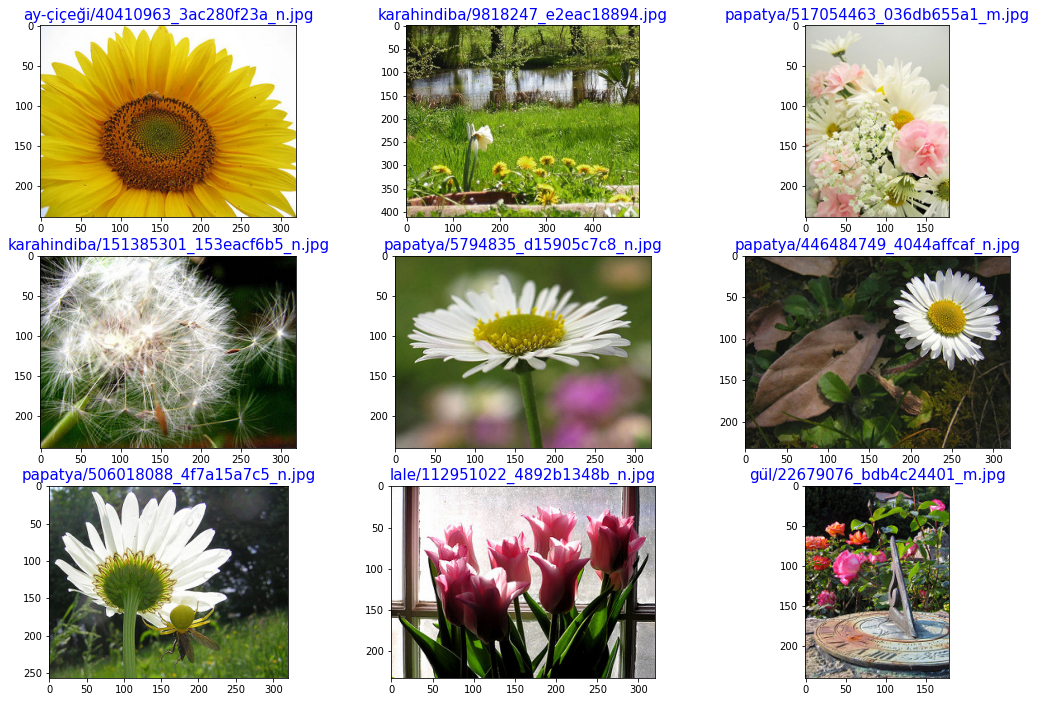

In [11]:
# Veri setindeki bazı görüntülerin rastgele olarak gözlemlenmesi
def select_randomly(k):
  images = []
  for folder in os.listdir(folder_dir):
    for image in os.listdir(folder_dir + '/' + folder):
      images.append(os.path.join(folder_dir, folder, image))
    
  plt.figure(1, figsize = (18, 12))
  plt.axis('off')

  n = 0
  for i in range(k * k):
    n += 1
    random_img = random.choice(images)
    img = imread(random_img)
    plt.subplot(k, k, n)
    plt.imshow(img)
    plt.title(random_img[47:], color = 'blue', fontsize = 15)
  plt.show()
  
select_randomly(3)

### SVM (Support Vector Machine- Destek Vektör Makinesi) Sınıflandırıcısı

In [12]:
grid_params_svm = {'C' : [1], 'gamma' : ['auto'], 'kernel' : ['rbf', 'linear']}

search_CV_svm = svm.SVC(probability = True)
model_svm = GridSearchCV(search_CV_svm, grid_params_svm)
model_svm.fit(X_train, Y_train)
print("Model eğitim işlemi bitti!")

Model eğitim işlemi bitti!


In [13]:
print(f'... GridSearchCV ile belirlenen en iyi model parametreleri : {model_svm.best_params_}')

... GridSearchCV ile belirlenen en iyi model parametreleri : {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}


In [14]:
svm_classifier = svm.SVC(C = 1, gamma = 'auto', kernel = 'linear', probability = True)
svm_classifier.fit(X_train, Y_train)

SVC(C=1, gamma='auto', kernel='linear', probability=True)

In [25]:
# Model performansının değerlendirildiği fonksiyonun oluşturulması
def performans_degerlendirme(model, X, y, X_test, Y_test):
  print('\nModel test ediliyor...')

  y_pred = model.predict(X_test)
  result = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})
  print(result)
  print('\n')

  print('Model Adı : ', model)
  print(f"... Model doğruluk oranı : %{accuracy_score(y_pred, Y_test)*100} dir.")
  print(f"... Model kesinlik oranı : %{precision_score(y_pred, Y_test, average = 'macro')*100} dir.")
  print(f"... Model duyarlılık oranı : %{recall_score(y_pred, Y_test, average = 'macro')*100} dir.")
  print(f"... Model f1 skoru : %{f1_score(y_pred, Y_test, average = 'macro')*100} dir.")
  print(f"... Model cross val : %{cross_val_score(model, X, y, cv = 3).mean()*100} dir.")
  print('\n')
  print('... Model confusion matrix : \n')
  confusion_mtx = confusion_matrix(y_pred, Y_test)
  f, ax = plt.subplots(figsize = (5, 4))
  sns.heatmap(confusion_mtx, annot = True, linewidth = 0.01, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', ax = ax)
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.title('Confusion Matrix')
  plt.show()



Model test ediliyor...
    Actual  Predicted
0        3          2
1        4          2
2        2          0
3        0          2
4        3          1
5        3          3
6        3          0
7        1          1
8        0          2
9        2          4
10       3          4
11       0          2
12       3          0
13       0          0
14       3          1
15       3          1
16       4          2
17       3          4
18       2          1
19       2          2
20       1          3
21       1          2
22       4          2
23       4          4
24       1          2
25       0          0
26       4          1
27       4          4
28       2          3
29       3          2
30       0          2
31       2          2
32       0          0
33       0          2
34       3          1
35       1          3
36       0          2
37       1          0
38       0          0
39       1          1
40       1          2
41       1          1
42       4          4
43      

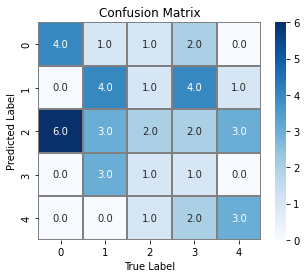

In [26]:
performans_degerlendirme(svm_classifier, X, y, X_test, Y_test)

In [21]:
# Model kaydetme işlemi
def model_kaydet(model_adi, model_alg):
  pick = open('/content/drive/MyDrive/Colab Notebooks/Models/'+model_adi+'.p','wb')
  pickle.dump(model_alg, pick)
  pick.close()
  print(f' {model_adi} Model dosyası başarıyla oluşturuldu!...')

In [22]:
model_kaydet('svm_classification', svm_classifier)

 svm_classification Model dosyası başarıyla oluşturuldu!...


In [24]:
# Kaydedilen model diskten çağırılıyor.
svm_load = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Models/svm_classification.p', 'rb'))
print('\nModel diskten yüklenmiştir.')


Model diskten yüklenmiştir.


In [41]:
def tahminleyici(model_loaded):
  images = []
  siniflar = ['ay-çiçeği', 'gül', 'karahindiba', 'lale', 'papatya']

  for folder in os.listdir(folder_dir):
    for image in os.listdir(folder_dir + '/' + folder):
      images.append(os.path.join(folder_dir, folder, image))
    
  plt.figure(1, figsize = (5, 4))
  plt.axis('off')

  n = 0
  for i in range(1):
    n += 1
    random_img = random.choice(images)
    print(random_img[47:])
    img = imread(random_img)
    plt.subplot(1, 1, n)
    plt.imshow(img)
  plt.show()

  img_resize = resize(img, (150,150,3))
  img_f = [img_resize.flatten()]
  tahmin = model_loaded.predict_proba(img_f)

  siniflar_dict = {}
  for i in range(len(siniflar)):
    siniflar_dict[i] = siniflar[i]
  
  for i, sinif in siniflar_dict.items():
    print(sinif, '=', '%', format((tahmin[0][i])*100, '06.3f'))
  print('Görüntünün tahmin edilen sınıfı : ', siniflar[model_loaded.predict(img_f)[0]])

papatya/512477177_d9004cbcf1_n.jpg


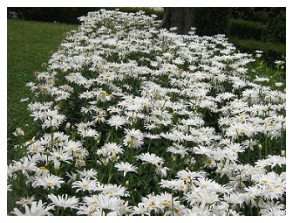

ay-çiçeği = % 03.799
gül = % 17.208
karahindiba = % 21.891
lale = % 08.847
papatya = % 48.255
Görüntünün tahmin edilen sınıfı :  papatya


In [42]:
tahminleyici(svm_load)

### Karar Ağacı (Decision Tree) Sınıflandırıcısı

In [43]:
grid_params_dt = {'max_features' : ['auto', 'sqrt', 'log2'],
                  'ccp_alpha' : [.1, .01, .001],
                  'max_depth' : [5, 6, 7, 8, 9],
                  'criterion' : ['gini', 'entropy']
                  }

search_CV_dt = DecisionTreeClassifier(random_state = 1024)
model_dt = GridSearchCV(search_CV_dt, grid_params_dt)
model_dt.fit(X_train, Y_train)
print("Model eğitim işlemi bitti!")

Model eğitim işlemi bitti!


In [44]:
print(f'... GridSearchCV ile belirlenen en iyi model parametreleri : {model_dt.best_params_}')

... GridSearchCV ile belirlenen en iyi model parametreleri : {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}


In [45]:
dt_classifier = DecisionTreeClassifier(ccp_alpha = 0.01, criterion = 'gini', max_depth = 9, max_features = 'auto', random_state = 1024)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=9, max_features='auto',
                       random_state=1024)


Model test ediliyor...
    Actual  Predicted
0        3          0
1        4          4
2        2          0
3        0          1
4        3          4
5        3          3
6        3          3
7        1          0
8        0          0
9        2          4
10       3          4
11       0          0
12       3          4
13       0          0
14       3          3
15       3          4
16       4          0
17       3          4
18       2          2
19       2          0
20       1          1
21       1          1
22       4          3
23       4          1
24       1          1
25       0          1
26       4          2
27       4          1
28       2          3
29       3          1
30       0          0
31       2          1
32       0          2
33       0          2
34       3          0
35       1          0
36       0          3
37       1          3
38       0          0
39       1          1
40       1          4
41       1          1
42       4          2
43      

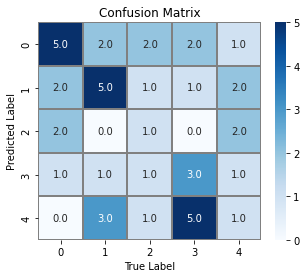

In [46]:
performans_degerlendirme(dt_classifier, X, y, X_test, Y_test)

In [47]:
model_kaydet('decision_tree_classifier', dt_classifier)

 decision_tree_classifier Model dosyası başarıyla oluşturuldu!...


In [48]:
decision_load = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Models/decision_tree_classifier.p', 'rb'))
print('\nModel diskten yüklenmiştir.')


Model diskten yüklenmiştir.


karahindiba/16987075_9a690a2183.jpg


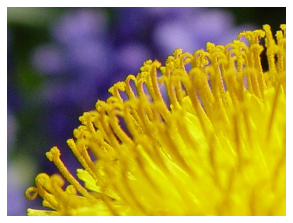

ay-çiçeği = % 00.000
gül = % 00.000
karahindiba = % 100.000
lale = % 00.000
papatya = % 00.000
Görüntünün tahmin edilen sınıfı :  karahindiba


In [50]:
tahminleyici(decision_load)

### RF (Random Forest-Rastgele Orman) Sınıflandırıcısı

In [52]:
grid_params_rf = {'min_samples_split' : [5, 10],
                  'max_features' : ['auto'],
                  'max_depth' : [5, 10],
                  'n_estimators' : [100, 200]
                  }

search_CV_rf = RandomForestClassifier(random_state = 42)
model_rf = GridSearchCV(search_CV_rf, grid_params_rf)
model_rf.fit(X_train, Y_train)
print("Model eğitim işlemi bitti!")

Model eğitim işlemi bitti!


In [53]:
print(f'... GridSearchCV ile belirlenen en iyi model parametreleri : {model_rf.best_params_}')

... GridSearchCV ile belirlenen en iyi model parametreleri : {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 100}


In [55]:
rf_classifier = RandomForestClassifier(max_depth = 10, max_features = 'auto', min_samples_split = 5, n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       random_state=42)


Model test ediliyor...
    Actual  Predicted
0        3          3
1        4          1
2        2          0
3        0          0
4        3          3
5        3          4
6        3          3
7        1          3
8        0          0
9        2          4
10       3          4
11       0          0
12       3          2
13       0          0
14       3          1
15       3          4
16       4          2
17       3          4
18       2          1
19       2          2
20       1          3
21       1          2
22       4          1
23       4          4
24       1          2
25       0          1
26       4          4
27       4          4
28       2          3
29       3          2
30       0          2
31       2          2
32       0          2
33       0          0
34       3          3
35       1          1
36       0          0
37       1          3
38       0          0
39       1          1
40       1          4
41       1          1
42       4          4
43      

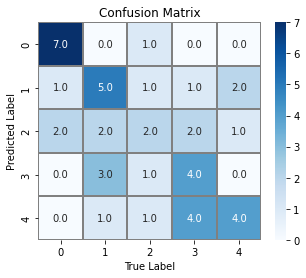

In [56]:
performans_degerlendirme(rf_classifier, X, y, X_test, Y_test)

In [57]:
model_kaydet('random_forest_classifier', rf_classifier)

 random_forest_classifier Model dosyası başarıyla oluşturuldu!...


In [58]:
random_load = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Models/random_forest_classifier.p', 'rb'))
print('\nModel diskten yüklenmiştir.')


Model diskten yüklenmiştir.


ay-çiçeği/184682652_c927a49226_m.jpg


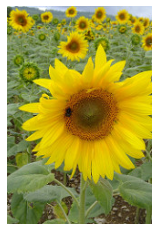

ay-çiçeği = % 80.583
gül = % 04.667
karahindiba = % 05.000
lale = % 06.250
papatya = % 03.500
Görüntünün tahmin edilen sınıfı :  ay-çiçeği


In [59]:
tahminleyici(random_load)

### K En Yakın Komşu (K-Nearest Neighbours – KNN) Sınıflandırıcısı

In [60]:
grid_params_knn = {'n_neighbors' : [3, 5, 11, 19],
                  'weights' : ['uniform', 'distance'],
                  'metric' : ['euclidean', 'manhattan'],
                  'algorithm' : ['auto'],
                   'leaf_size' : [1, 2, 3], 
                   'p' : [1, 2]
                  }

search_CV_knn = KNeighborsClassifier()
model_knn = GridSearchCV(search_CV_knn, grid_params_knn)
model_knn.fit(X_train, Y_train)
print("Model eğitim işlemi bitti!")

Model eğitim işlemi bitti!


In [61]:
print(f'... GridSearchCV ile belirlenen en iyi model parametreleri : {model_knn.best_params_}')

... GridSearchCV ile belirlenen en iyi model parametreleri : {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [62]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'manhattan', algorithm = 'auto', leaf_size = 1, p = 1 )
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=3, p=1)


Model test ediliyor...
    Actual  Predicted
0        3          4
1        4          2
2        2          0
3        0          0
4        3          0
5        3          2
6        3          3
7        1          0
8        0          0
9        2          2
10       3          0
11       0          2
12       3          2
13       0          0
14       3          0
15       3          4
16       4          2
17       3          1
18       2          2
19       2          2
20       1          0
21       1          2
22       4          2
23       4          1
24       1          2
25       0          1
26       4          0
27       4          4
28       2          2
29       3          0
30       0          2
31       2          2
32       0          2
33       0          0
34       3          4
35       1          1
36       0          0
37       1          0
38       0          0
39       1          3
40       1          4
41       1          0
42       4          2
43      

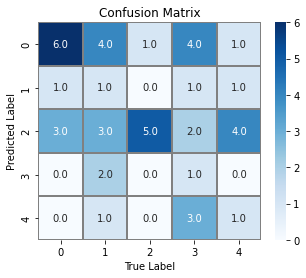

In [63]:
performans_degerlendirme(knn_classifier, X, y, X_test, Y_test)

In [64]:
model_kaydet('knn_classifier', knn_classifier)

 knn_classifier Model dosyası başarıyla oluşturuldu!...


In [65]:
knn_load = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Models/knn_classifier.p', 'rb'))
print('\nModel diskten yüklenmiştir.')


Model diskten yüklenmiştir.


gül/909277823_e6fb8cb5c8_n.jpg


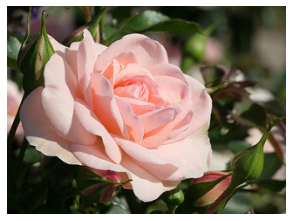

ay-çiçeği = % 00.000
gül = % 66.667
karahindiba = % 00.000
lale = % 00.000
papatya = % 33.333
Görüntünün tahmin edilen sınıfı :  gül


In [67]:
tahminleyici(knn_load)

###  Lojistik Regresyon (Logistic Regression) Sınıflandırıcısı

In [68]:
grid_params_lr = {'C' : np.logspace(-3,3,7),
                  'penalty' : ['l1', 'l2']
                  }

search_CV_lr = LogisticRegression()
model_lr = GridSearchCV(search_CV_lr, grid_params_lr)
model_lr.fit(X_train, Y_train)
print("Model eğitim işlemi bitti!")

Model eğitim işlemi bitti!


In [69]:
print(f'... GridSearchCV ile belirlenen en iyi model parametreleri : {model_lr.best_params_}')

... GridSearchCV ile belirlenen en iyi model parametreleri : {'C': 0.001, 'penalty': 'l2'}


In [70]:
lr_classifier = LogisticRegression(C = 0.001, penalty = 'l2')
lr_classifier.fit(X_train, Y_train)

LogisticRegression(C=0.001)


Model test ediliyor...
    Actual  Predicted
0        3          3
1        4          4
2        2          0
3        0          0
4        3          1
5        3          3
6        3          3
7        1          1
8        0          0
9        2          4
10       3          4
11       0          0
12       3          0
13       0          0
14       3          3
15       3          0
16       4          2
17       3          4
18       2          1
19       2          2
20       1          3
21       1          4
22       4          2
23       4          4
24       1          4
25       0          4
26       4          2
27       4          4
28       2          1
29       3          4
30       0          2
31       2          2
32       0          0
33       0          0
34       3          1
35       1          3
36       0          0
37       1          3
38       0          0
39       1          1
40       1          3
41       1          1
42       4          4
43      

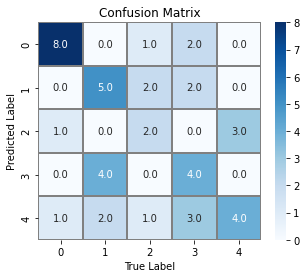

In [71]:
performans_degerlendirme(lr_classifier, X, y, X_test, Y_test)

In [72]:
model_kaydet('logistic_classifier', lr_classifier)

 logistic_classifier Model dosyası başarıyla oluşturuldu!...


In [73]:
lr_load = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Models/logistic_classifier.p', 'rb'))
print('\nModel diskten yüklenmiştir.')


Model diskten yüklenmiştir.


karahindiba/163702807_e508544acd_n.jpg


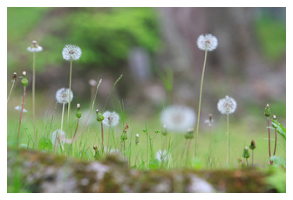

ay-çiçeği = % 09.729
gül = % 10.650
karahindiba = % 48.426
lale = % 08.734
papatya = % 22.462
Görüntünün tahmin edilen sınıfı :  karahindiba


In [74]:
tahminleyici(lr_load)

### Model Karşılaştırma

In [75]:
modeller = []
path_model = '/content/drive/MyDrive/Colab Notebooks/Models/'
def model_load(dosya):
    for modelim in os.listdir(dosya):
        modeller.append(modelim)
    
model_load(path_model)
print(modeller)

['svm_classification.p', 'decision_tree_classifier.p', 'random_forest_classifier.p', 'knn_classifier.p', 'logistic_classifier.p']


In [76]:
accuracy_values=[]
recall_values = []
precision_values = []
f1_values = []

def metric_degerlendirmeler(kayitli_model, x_test_data,y_test_data):
    modelx=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Models/'+kayitli_model,'rb'))
    y_pred = modelx.predict(x_test_data)
    accuracy_values.append(accuracy_score(y_test_data,y_pred)*100)
    recall_values.append(recall_score(y_test_data,y_pred,average='macro')*100)
    precision_values.append(precision_score(y_test_data,y_pred,average='macro')*100)
    f1_values.append(f1_score(y_test_data,y_pred,average='macro')*100)
    
for i in modeller:
    metric_degerlendirmeler(i,X_test,Y_test)
    

In [77]:
tum_metricler = [accuracy_values,recall_values,precision_values,f1_values]
metric_adlari = ['accuracy_values','recall_values','precision_values','f1_values']

In [78]:
def metric_ciz(cizilecek_data,metric_adi):
    plt.subplots(figsize =(10, 8))

    sns.barplot(x='Score', y = 'Model', data = cizilecek_data, palette="Set3")

    #prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
    plt.title(f'Machine Learning Algorithm {metric_adi} Score \n')
    plt.xlabel(f'{metric_adi} (%)')
    plt.ylabel('Algorithms')
    plt.show()

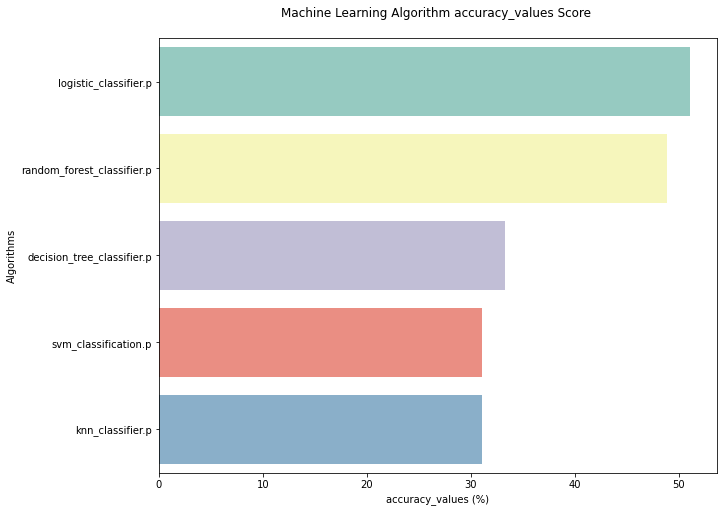

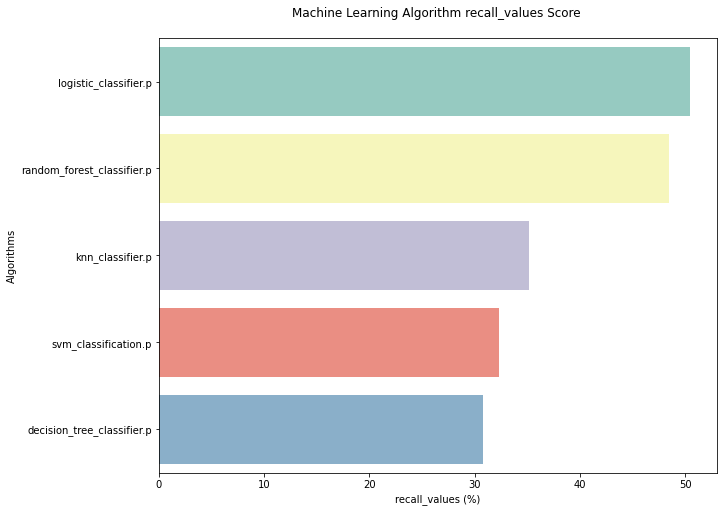

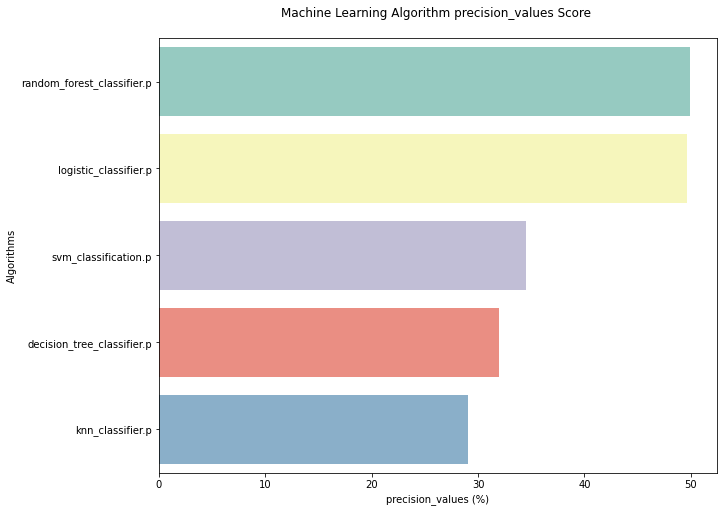

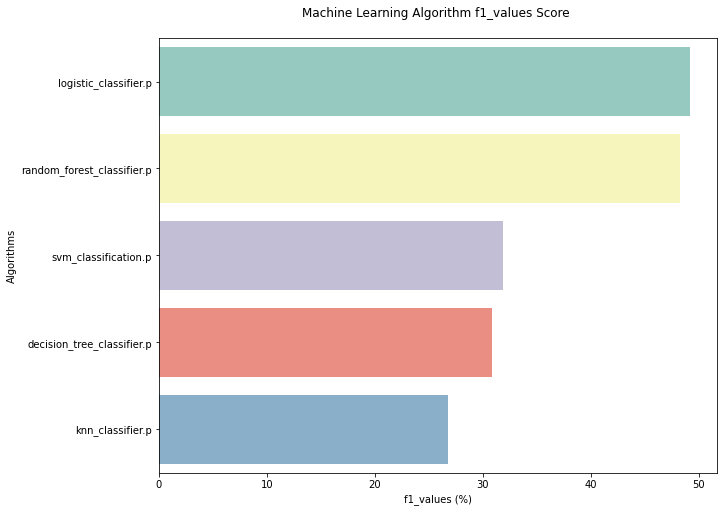

In [79]:
sayac = 0
for metric in tum_metricler:
    models = pd.DataFrame({
        'Model': modeller,
        'Score': metric})
    sorted_models = models.sort_values(by='Score', ascending=False)
    metric_ciz(sorted_models,metric_adlari[sayac])
    sayac = sayac + 1